In [ ]:
# LASER
!python -m laserembeddings download-models

# SENTENCE-BERT
!pip install transformers # https://github.com/huggingface/transformers
!pip install -U sentence-transformers # https://github.com/UKPLab/sentence-transformers

# UNIVERSAL SENTENCE ENCODER
!pip install tensorflow
!pip install tensorflow_hub

# FASTTEXT
!pip install fasttext

In [2]:
import seaborn as sns
import numpy as np

from models import FastText, LaserModel, SentenceBert, Tfidf, Use
from utils import cosine_similarity, plot_similarity
from arrays import same, different, synonyms, homonyms, sports_search, politics_search, food_search, science_search, finance_search, search, search_categories, sentences, sentence_categories

## 1. Choose which model to use

Available models:
* FastText
* LaserModel
* SentenceBert
* Tfidf
* Use

In [3]:
# Choose the model to use:
model = SentenceBert()

## 2. Create vectors

In [4]:
same_vectors = model.get_sentence_vec(same)
different_vectors = model.get_sentence_vec(different)
synonym_vectors = model.get_sentence_vec(synonyms)
homonym_vectors = model.get_sentence_vec(homonyms)
sports_vector = model.get_sentence_vec(sports_search)
politics_vector = model.get_sentence_vec(politics_search)
food_vector = model.get_sentence_vec(food_search)
science_vector = model.get_sentence_vec(science_search)
finance_vector = model.get_sentence_vec(finance_search)
search_vectors = model.get_sentence_vec(search)
sentence_vectors = model.get_sentence_vec(sentences)

## 3. Semantic Search

In [5]:
scores = []

# Choose your search term
search_term = politics_vector

for sentence in sentence_vectors:
    score = round(cosine_similarity(sentence, search_term),2)
    scores.append(score)

In [6]:
results = []

for (score,sentence,category) in zip(scores, sentences, sentence_categories):
    results.append([score, sentence, category])

results.sort(reverse=True)

for row in results:
    print(row[0], row[2], row[1])
    print()

0.21 POLITICS_1 This is election is a choice between President Trump’s strong stance with law and order and Joe Biden’s acquiescence to the anti-police left and siding with rioters.

0.15 FOOD_1 Made with fresh peaches, sugar, and a topping that bakes like slightly underbaked cookie dough, with crunchy sugar broiled on top.

0.1 SPORTS_2 And just like we saw in both games against FC Dallas, Nashville was sharp in the defensive third and in midfield.

0.09 FOOD_2 Is there anything better than a fresh batch of soft chocolate chip cookies?

0.07 SCIENCE_1 Scientists from 17 UK research centres are attempting to answer questions such as how long immunity lasts and why disease severity varies so much.

0.07 SCIENCE_2 Decoding goals and movement plans is hard when you don't understand the neural code in which those things are communicated.

0.03 SPORTS_1 The Vikings defense is already one of the best in the NFL and won’t ask much of Gladney.

0.03 POLITICS_2 Democrats are willing to resume n

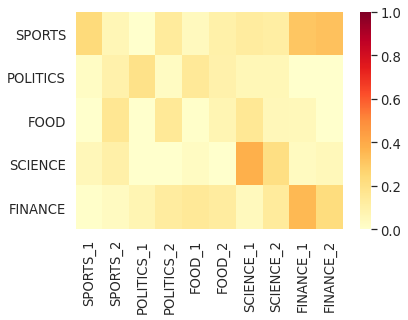

In [7]:
plot_similarity(search_categories, sentence_categories, search_vectors, sentence_vectors)